<h2>Part 0: Introduction </h2>

In this tutorial, you will learn how to build a neural network for image classification using Logistic Regression from scratch

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import re

%matplotlib inline

<h3> Part 1 Goal </h3>

In [ ]:
%%html
<img src="images/image2vector_kiank.png",width=500,height=300>

<h3> Part 2 Goal </h3>

In [ ]:
%%html
<img src="images/LogReg_kiank.png",width=500,height=300>

<h2> Part 1: Data Preprocess </h2>

Create a folder with the following folders.
<br>
<br>
birds: contains images of the birds
<br>
other_images: contains a mix of random images
<br>
train_set: contains the images that will be used for training
<br>
test_set: contains the images that will be used to test the training model

<p> Objective <p>
<li> Load the Dataset </li>
<li> Visualize the Dataset </li>
<li> Get a general understanding of the dataset </li>
<li> Flatten and Reshape </li>
<li> Standarize the Data </li>

<p> Step 1: Load the Dataset <p>

In [ ]:
def renamed_files(path, label):
    """
    Rename files so they can contain "bird", this will be used to create the labels

    Arguments:
    path -- path where images are located that will be renamed
    label -- the label the images will be get

    Output:
    files will be renamed in the same folder
    """
    i = 0

    for filename in os.listdir(path):
        try:
            f, extension = os.path.splitext(path+filename)
            src = path+filename
            dst = path+label+str(i)+extension
            os.rename(src, dst)
            i += 1

        except Exception as e:
            print(e)
            i += 1


path = "C://Users//Maged Helmy//Desktop//youTube//data_1//Test_Set//"
label = "bird"

renamed_files(path, label)

In [ ]:
def resize_images(src_path, dst_path):
    """
    # Resize images to 64 by 64 to speed up training process


    Arguments:
    src_path -- path where images are located that will be resized
    dst_path -- new path where images are reized will be resized

    Output:
    images will be resized and save to dst_path provided    
    """

    for filename in os.listdir(src_path):

        try:
            img = Image.open(src_path+filename)
            new_img = img.resize((64, 64))
            
            if not os.path.exists(dst_path):
                os.makedirs(dst_path)

            new_img.save(dst_path+filename)
            print('Resized and saved {} successfully.'.format(filename))

        except Exception as e:
            print(e)
            continue


src_path = "C://Users//Maged Helmy//Desktop//youTube//data_1//birds//"
dst_path = "C://Users//Maged Helmy//Desktop//youTube//data_1//training_set//"

resize_images(src_path, dst_path)

In [2]:
def get_data(path):
    """
    # Resize images to 64 by 64 to speed up training process


    Arguments:
    path -- path to where data is stored

    Output:
    np.array(all_images_as_array): Images converted to an array
    np.array(label).reshape(1,-1): Labels extracted from images
    """

    all_images_as_array = []
    label = []

    for filename in os.listdir(path):
        try:
            if re.match(r'bird', filename):
                label.append(1)
            else:
                label.append(0)

            img = Image.open(path + filename)
            np_array = np.asarray(img)
            #l, b, c = np_array.shape
            #np_array = np_array.reshape(l*b*c,)
            all_images_as_array.append(np_array)
        except:
            continue
    return np.array(all_images_as_array), np.array(label).reshape(1, -1)


path_to_train_set = "C://Users//Maged Helmy//Desktop//youTube//data_1//train_set//"
path_to_test_set = "C://Users//Maged Helmy//Desktop//youTube//data_1//test_set//"

train_set_x_orig, train_set_y = get_data(path_to_train_set)
test_set_x_orig, test_set_y = get_data(path_to_test_set)

print('X_train set : ', train_set_x_orig)
print('y_train set : ', train_set_y)
print('X_test set : ', test_set_x_orig)
print('y_test set : ', test_set_y)

X_train set :  [[[[ 19  19  19]
   [ 16  16  16]
   [ 14  14  14]
   ...
   [134 134 134]
   [135 135 135]
   [140 140 140]]

  [[ 19  19  19]
   [ 17  17  17]
   [ 14  14  14]
   ...
   [137 137 137]
   [138 138 138]
   [142 142 142]]

  [[ 20  20  20]
   [ 18  18  18]
   [ 16  16  16]
   ...
   [139 139 139]
   [138 138 138]
   [142 142 142]]

  ...

  [[ 10  10  10]
   [ 10  10  10]
   [ 10  10  10]
   ...
   [ 94  94  94]
   [ 91  91  91]
   [ 88  88  88]]

  [[  8   8   8]
   [  9   9   9]
   [  9   9   9]
   ...
   [ 88  88  88]
   [ 82  82  82]
   [ 77  77  77]]

  [[  8   8   8]
   [  8   8   8]
   [  9   9   9]
   ...
   [ 80  80  80]
   [ 77  77  77]
   [ 74  74  74]]]


 [[[117  98 100]
   [126 107 109]
   [133 114 116]
   ...
   [116  18  31]
   [115  17  30]
   [114  16  29]]

  [[117  98 100]
   [126 107 109]
   [133 114 116]
   ...
   [116  18  31]
   [115  17  30]
   [114  16  29]]

  [[117  98 100]
   [126 107 109]
   [133 114 116]
   ...
   [116  18  31]
   [114  16  

<p> Step 1.1: Create Classes <p>

In [3]:
#Create classes for your data
list_classes = ['non-bird','bird']
classes = np.array(list_classes) 
classes

array(['non-bird', 'bird'], dtype='<U8')

<p> Step 2: Visualize the Dataset <p>

y = [1], it's a 'bird' picture.


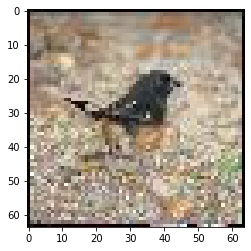

In [4]:
# Example of a picture
index = 350

plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])] +  "' picture.")

<p> Step 3: Get a general feeling of the dataset <p>

In [5]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 443
Number of testing examples: m_test = 63
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (443, 64, 64, 3)
train_set_y shape: (1, 443)
test_set_x shape: (63, 64, 64, 3)
test_set_y shape: (1, 63)


<p> Step 4: Flatten and Reshape the Dataset for Convenience of Representation<p>

In [6]:
# Reshape the training and test examples

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))


train_set_x_flatten shape: (12288, 443)
train_set_y shape: (1, 443)
test_set_x_flatten shape: (12288, 63)
test_set_y shape: (1, 63)


<p> Step 5: Standarize the Dataset <p>

In [7]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

<h2> Part 2.0: Recap Neural Architecture </h2>

<p> Objective <p>
<li> Write a sigmoid function </li>
<li> Write a function to initlize logistic regression parameters w and b with zero</li>
<li> Write a function that implements forward, backward and learning rate </li>
<li> Write a function to predict, maybe merge with above ? </li>
<li> Merge all above functions in a single function called model </li>
<li> Adjust Learning Rates </li>    
<li> Visualize Learning Rates </li>    
<li> Add your own image </li>    

<h2> Part 2.1: Recap Logistic Regression </h2>

**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)}) = \frac{1}{1 + e^{-(z)}} \tag{2}$$
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

<h2> Part 2.2: Sigmoid Function </h2>

In [8]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    
    s = 1 / (1 + np.exp(-z))
    
    return s

<h2> Part 2.3: Intialize Values with Zero Function </h2>

In [9]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.zeros((dim,1))
    b = 0
    
    return w, b

<h2> Part 2.4: Implement Forward  Propogation, Backward  Propogation, Iteration and Learning Rate </h2>

In [10]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Get the amount of training set
        m = X.shape[1]

        # FORWARD PROPAGATION (FROM X TO COST)
        A = sigmoid(np.dot(w.T,X)+b)                                  # compute activation
        cost = (-1/m)* np.sum((Y*np.log(A)) + (1-Y)*np.log(1-A))      # compute cost
        cost = np.squeeze(cost)


        # BACKWARD PROPAGATION (TO FIND GRAD)
        dw = (np.dot(X, np.subtract(A,Y).T)) / m
        db = (np.sum(A-Y)) / m

        grads = {"dw": dw,
                 "db": db}
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

<h2> Part 2.7: Implement Predict  </h2>

In [11]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        Y_prediction[0,i] = 0 if A[0,i] <= 0.5 else 1
    
    
    return Y_prediction

<h2> Part 2.8: The Model</h2>

In [17]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
        
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent 
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.324185
Cost after iteration 200: 0.280762
Cost after iteration 300: 0.251260
Cost after iteration 400: 0.228749
Cost after iteration 500: 0.210482
Cost after iteration 600: 0.195100
Cost after iteration 700: 0.181829
Cost after iteration 800: 0.170186
Cost after iteration 900: 0.159847
Cost after iteration 1000: 0.150581
Cost after iteration 1100: 0.142221
Cost after iteration 1200: 0.134638
Cost after iteration 1300: 0.127730
Cost after iteration 1400: 0.121415
Cost after iteration 1500: 0.115624
Cost after iteration 1600: 0.110299
Cost after iteration 1700: 0.105392
Cost after iteration 1800: 0.100860
Cost after iteration 1900: 0.096667
train accuracy: 98.87133182844244 %
test accuracy: 85.71428571428572 %


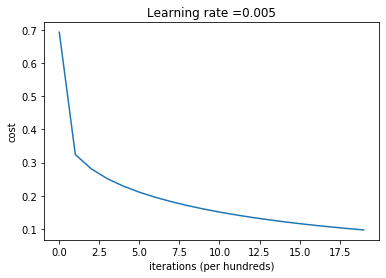

In [13]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

<h2> Part 2.9: Adjusting Learning Rates</h2>

learning rate is: 0.01
train accuracy: 99.54853273137698 %
test accuracy: 85.71428571428572 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 90.51918735891648 %
test accuracy: 84.12698412698413 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 83.97291196388262 %
test accuracy: 77.77777777777777 %

-------------------------------------------------------



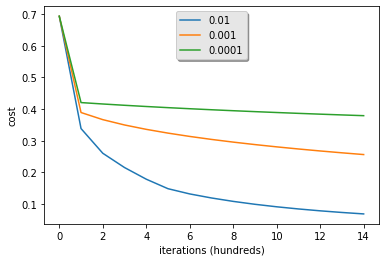

In [14]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

<h2> Part 2.10: Adding your own Image</h2>

y = 1.0, your algorithm predicts a "bird" picture.


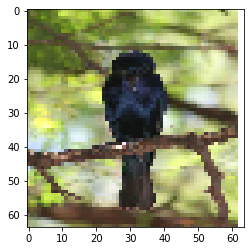

In [15]:
# We preprocess the image to fit your algorithm.

img = Image.open("C://Users//Maged Helmy//Desktop//youTube//data_1//archive//images//027.Shiny_Cowbird//Shiny_Cowbird_0001_480522861.jpg")
new_img = img.resize((64, 64))
np_array = np.asarray(new_img)

my_image_flatten = np_array/255.
my_image = my_image_flatten.reshape(1, -1).T

my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(my_image_flatten)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),] +  "\" picture.")